# Probability of an outage: Understanding Kenya's Power Grid Reliability Through Data

## Abstract

"When the well is dry, we know the worth of the water." The same is true for electricity: it often takes a blackout to remind us of its value.

Kenya’s electricity sector has made remarkable progress in renewable energy generation, approximately 81% of the electrical energy used comes from clean sources such as geothermal, hydro and wind, 8% of the electrical energy comes from fossil fuel based generation for maintaining voltage stability during peak demand and 11% from imports mainly from Ethiopia (most likely from the Grand Renaissance Hydro Power Dam). Having climate friendly, renewable energy generation has its downsides. Between March and December 2023, Kenya experienced three nationwide blackouts on March 4th, August 25th and December 10th-11th caused by system disturbances , transmission failure and the sudden loss of generation from the Lake Turkana Wind Power Plant. In 2024, nationwide and near-nationwide blackouts were recorded on May 2nd, September 6th and December 18th showing the fragility of the grid’s transmission and balancing capacity. No such blackouts have been recorded in 2025 (as of August) suggesting signs of an improvement in operational control and thus grid resilience.

Utilizing data from the Energy and Petroleum Regulatory Authority (EPRA) reliability indices, Kenya Power (KPLC) public interruption notices collected from October 2023 to Sept 2025, this project estimates the overall probability of a blackout at 0.14. The finding was independently confirmed from System Average Interruption Frequency Index (SAIFI) reliability index and interruption data (0.143). The closeness of the alignment strengthens confidence in the assessment done. The convergence of these two probabilities suggests that KPLC has adopted a more proactive approach to system reliability by strategically scheduling maintenance interruptions to preempt unplanned failures. This may mark a shift toward anticipatory grid management, where “useful” planned outages replace “useless” unplanned interruptions that offer no preventative benefit. 

Overall, the project found that the number of electricity consumers rose by 61% from 6.07m in 2019 to 9.85m in 2025, as Kenya targets 100% renewable energy by 2030. Planned interruptions have become more frequent but also more purposeful, with households averaging four planned outages a month, typically lasting 2.5 hours. Counties such as Nairobi, Nyeri, Kiambu and Kilifi experience higher scheduled outage density due to maintenance prioritization, accounting for 10%, 7%, 6% and 5% of planned interruptions respectively. These counties had either high electrification rates or high populations near a critical urban area. For the use of renewable electricity sources to continue to increase, power reliability must improve rather than decline.

---

# Phase 1: Access - Data Acquisition

This study time overlap is November 2023 to December 2024 but the planned outage data can also answer questions on it's own.

Here I try and answer a few of these questions

## Description of Access Work - Data Acquisition

This first phase involved gaining access to the data, including handling legal, ethical, and availability challenges.

In the access section, I located the sources of my would be datasets.

1. Number of electrified households from Kenya census data from [Kenya 2019 Household type of Lighting Fuel (%) Census Data pages 338-349](https://www.knbs.or.ke/wp-content/uploads/2023/09/2019-Kenya-population-and-Housing-Census-Volume-4-Distribution-of-Population-by-Socio-Economic-Characteristics.pdf)

The Kenya National Bureau of Statistics does have a [data portal](http://data.knbs.or.ke/pages/themes) for some of the census data excluding type of Lighting Fuel, also one can request data from them through the email `datarequest@knbs.or.ke`. The email request may have been a simpler method that I did not follow. Instead I took the pdf and snipped it from pages 338 to 349. Then converted that data to excel using the site `https://www.ilovepdf.com/pdf_to_excel`. Their pdf to excel functionality was quite helpful. From there I conducted manual cleaning, I was interested in per county data but subcounty data is also available [here](https://github.com/Yuri-Njathi/impact-of-planned-vs-unplanned-power-interruptions/blob/main/data/type_of_lighting_fuel_census_2019_kenya.xlsx) I merged this data with population census data that was made available to me from Samuel Mbatia. I also added a Kenyan county code column to make sure merging with other data formats was simple.

The result:

From:

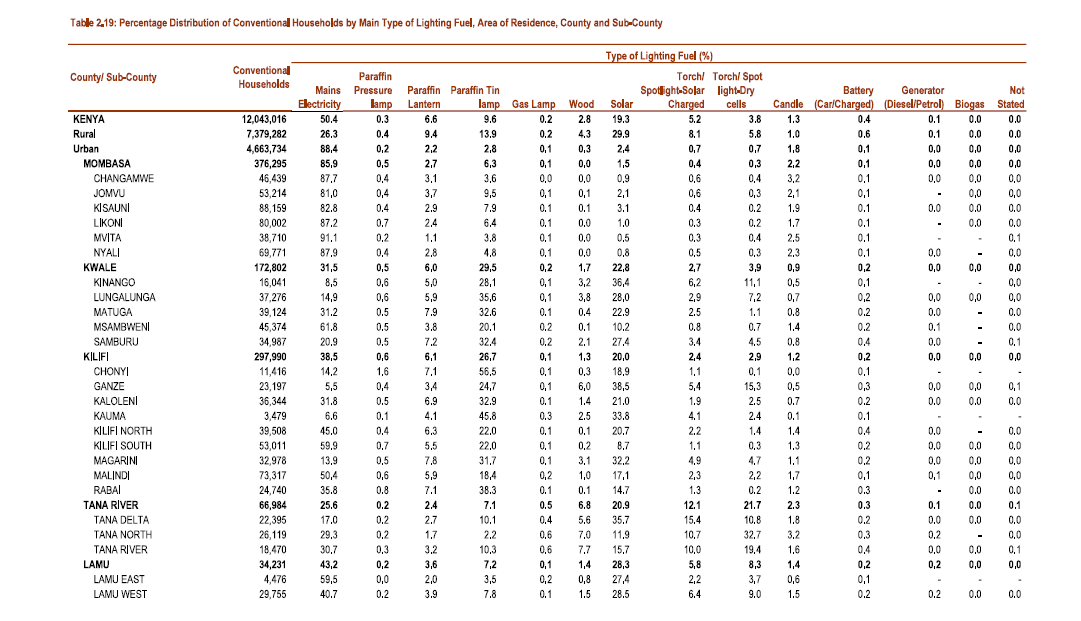

To:

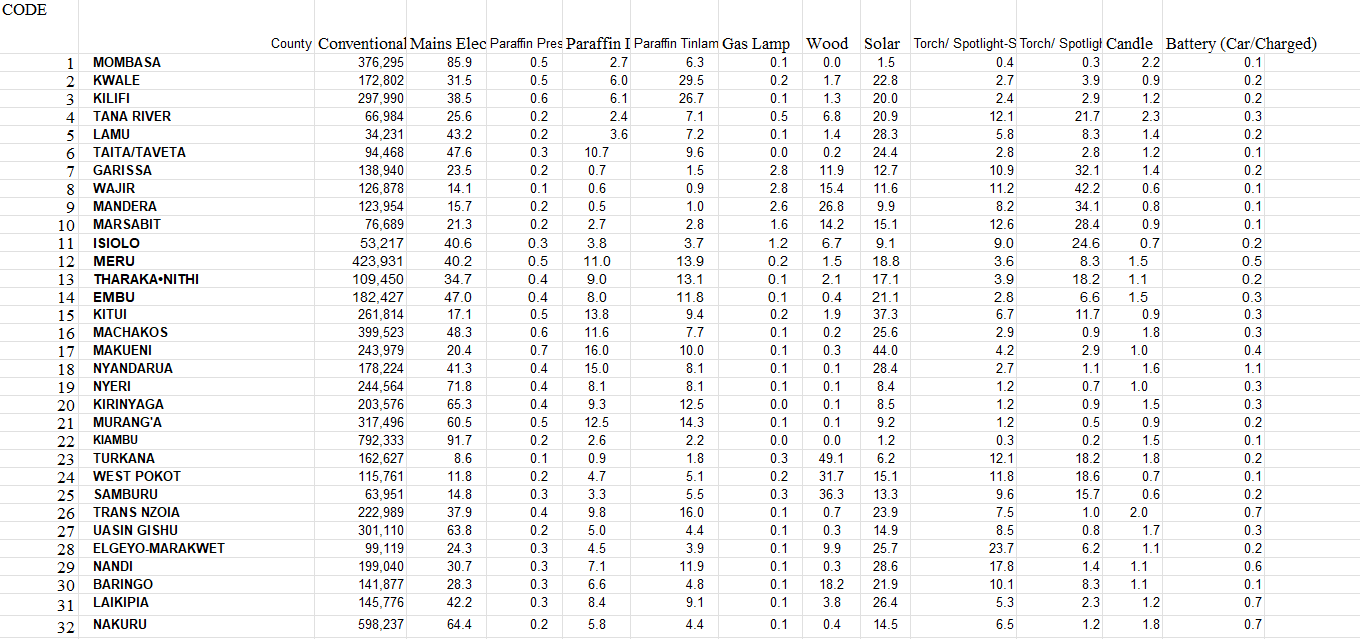

2. Reliability Index data was available from EPRA [2023/24](https://www.epra.go.ke/sites/default/files/2024-10/EPRA%20Energy%20and%20Petroleum%20Statistics%20Report%20FY%202023-2024_2.pdf) and [2024/25](https://www.epra.go.ke/bi-annual-energy-petroleum-statistics-report-20242025) reports. The indices available were CAIDI, SAIDI and SAIFI. This I also manually inputted it into a csv document. The data in nationwide only, no per county index.

The resulting data looks like this:

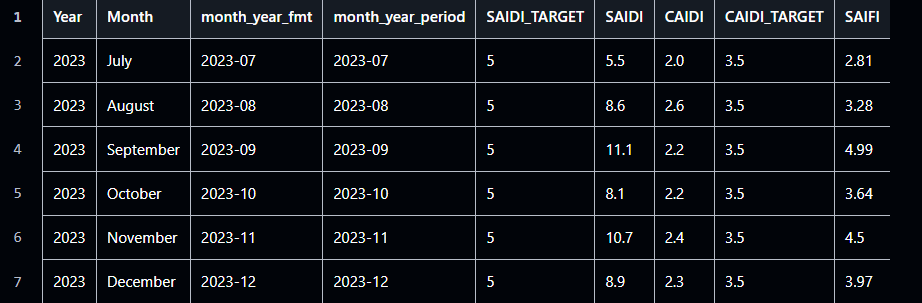

The data was available for the period July-2023 to Dec-2024.

3. Open Street Map of Kenya

I was initially using osmnx to plot my maps but I found that I was calling the API too often, so I downloaded the map of Kenya and Kenyan counties using this [notebook](https://github.com/Yuri-Njathi/impact-of-planned-vs-unplanned-power-interruptions/blob/main/notebooks/planned-vs-unplanned-v2.ipynb).

4. Obtain data from the KPLC interruption notices
Initially wanted to scrape from X.com (twitter) but scraping from the KPLC website was a logical and better idea.

I used `Beautiful Soup` module to scrape the pdfs from the [KPLC Interruptions notice webpage](https://www.kplc.co.ke/customer-support?page={1}#powerschedule). 55 notices were eventually scraped, 6 pdfs were deleted from the original 61 as the didn't have interruption notice information. 
 
A sample page of a pdf can be seen below.

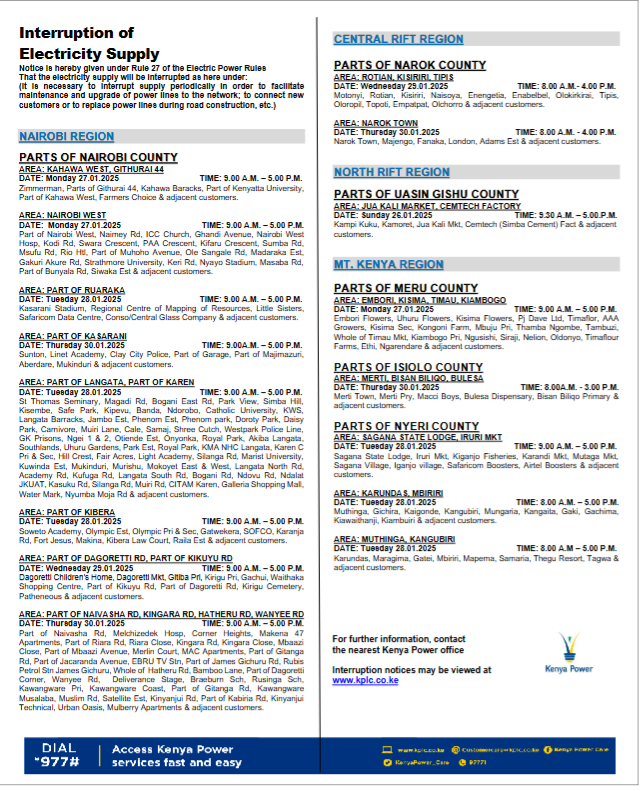

Using `PyPDF2`, the text in the pdfs was extracted and `regex` was used to obtain the `county`,`area`,`date`,`start and end time` and the `places affected`. Resulting into csv data in the below format:

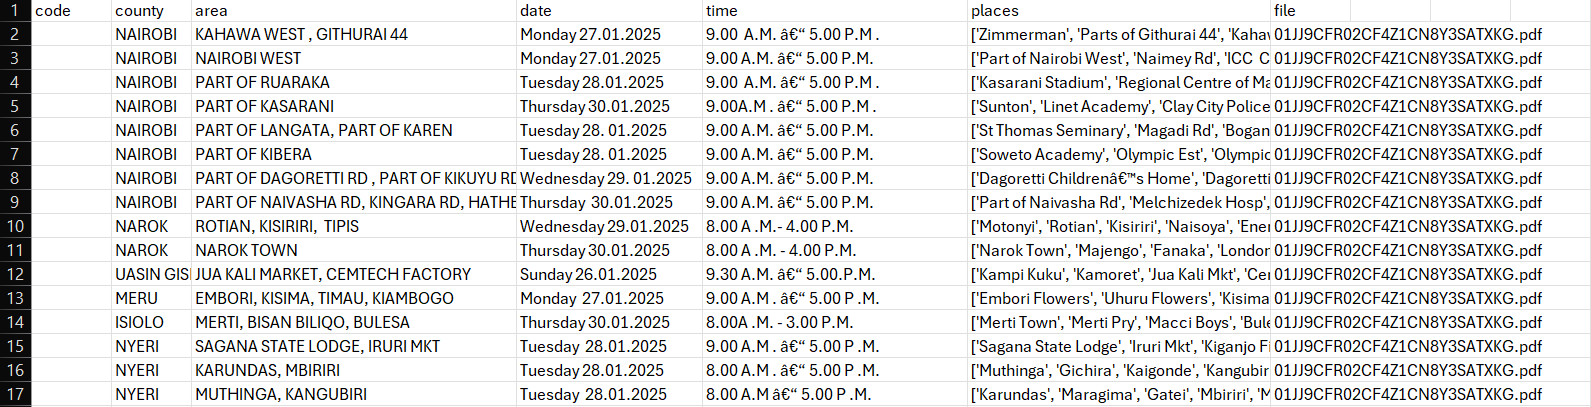

Ideally, I should have found a way to link conventional households to the affected areas and not just the county, unfortunately, I don't know at the moment where to get this data from.

The notices data had interesting problems with the time formatting such as 9am to 5 am and 8pm to 5pm. I currently believe these were errors and not that they were to conduct repairs/maintenance over night. I conducted quality checks `data assessing` on this interruptions data using this [notebook](https://github.com/Yuri-Njathi/impact-of-planned-vs-unplanned-power-interruptions/blob/main/notebooks/quality-check-kplc-interruptions-data.ipynb).

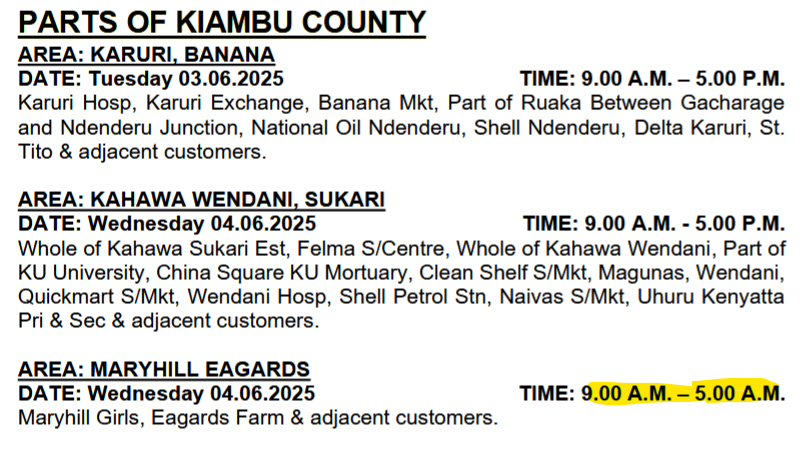

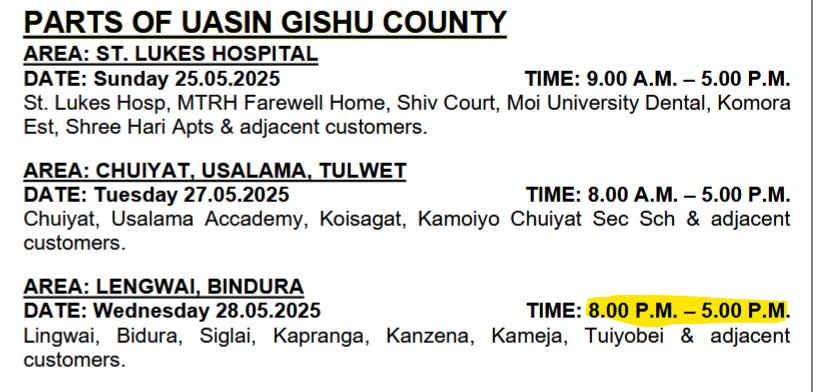

This study time overlap is November 2023 to December 2024 but the planned outage data can also answer questions on it's own

### Summary of access work

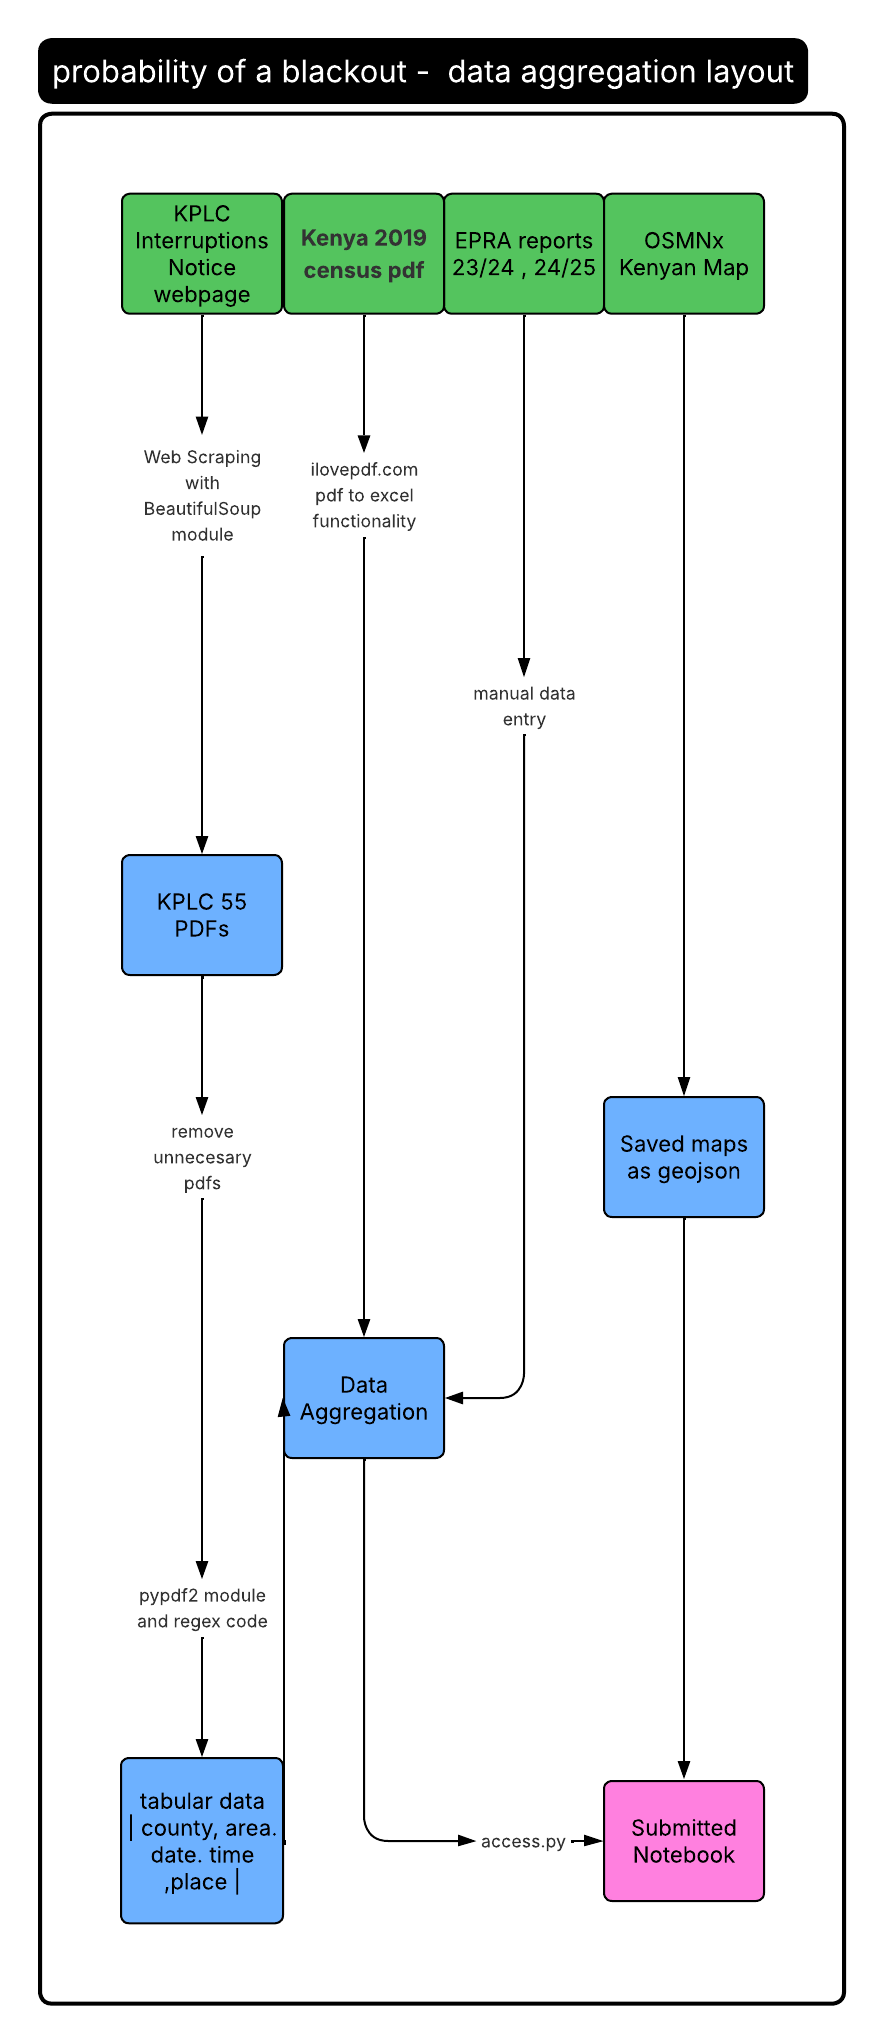

Below is the related question-answering notebook.

In [1]:
!git clone https://github.com/Yuri-Njathi/impact-of-planned-vs-unplanned-power-interruptions

Cloning into 'impact-of-planned-vs-unplanned-power-interruptions'...
remote: Enumerating objects: 529, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 529 (delta 173), reused 100 (delta 100), pack-reused 318 (from 1)
Receiving objects: 100% (529/529), 6.30 MiB | 16.75 MiB/s, done.
Resolving deltas: 100% (367/367), done.


In [2]:
import sys
sys.path.append("impact-of-planned-vs-unplanned-power-interruptions")

In [3]:
!pip install osmnx
import fynesse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [4]:
# Import the Fynesse framework
import fynesse
from fynesse import access, assess, address

# Import common data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Fynesse framework imported successfully")
print(f"📦 Framework version: {fynesse.__version__ if hasattr(fynesse, '__version__') else 'Development'}")

✅ Fynesse framework imported successfully
📦 Framework version: Development


In [5]:
# Load data using the access module
print("🔍 Loading data from access module...")
data = access.epra_data()

if data is not None:
    print(f"✅ Data loaded successfully: {len(data)} rows, {len(data.columns)} columns")
    print(f"📊 Data types: {data.dtypes.value_counts().to_dict()}")
else:
    print("❌ No data available. Please check your data source configuration.")
    print("💡 Tip: Update fynesse/defaults.yml with your data source information")

🔍 Loading data from access module...
✅ Data loaded successfully: 18 rows, 9 columns
📊 Data types: {dtype('float64'): 4, dtype('O'): 3, dtype('int64'): 2}


In [6]:
epra_data, kplc_data = access.epra_data(), access.census_kplc_data()

In [7]:
average_people_electrified_per_county = kplc_data['electrified_households'].mean()

## 1. How many Kenyan households are connected to electricity?

In [8]:
NT = kplc_data.groupby("CODE")["electrified_households"].mean().reset_index().sum()['electrified_households']
print(NT)

6066173.0


In [9]:
kplc_data

,date,county,total_duration,num_instances,month_year,CODE,Conventional Households,Mains Electricity,UNIT_AREA,UNIT_PERIM,COUNT,COUNTY_NAM,TOTAL_POP,POP_DENSIT,Latitude,Longitude,CHME,PPH,electrified_households
0,2024-09-30,mombasa,16.0,2.0,2024-09,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
1,2024-10-31,mombasa,8.0,1.0,2024-10,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
2,2024-12-31,mombasa,24.0,3.0,2024-12,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
3,2025-01-31,mombasa,40.0,5.0,2025-01,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
4,2025-02-28,mombasa,20.0,3.0,2025-02,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2025-05-31,nairobi,256.0,32.0,2025-05,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
385,2025-06-30,nairobi,40.0,5.0,2025-06,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
386,2025-07-31,nairobi,256.0,32.0,2025-07,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
387,2025-08-31,nairobi,237.0,28.0,2025-08,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362


6,066,173 Kenyan households are connected to electricity

## 2. Which Kenyan counties are most and least connected to electricity?

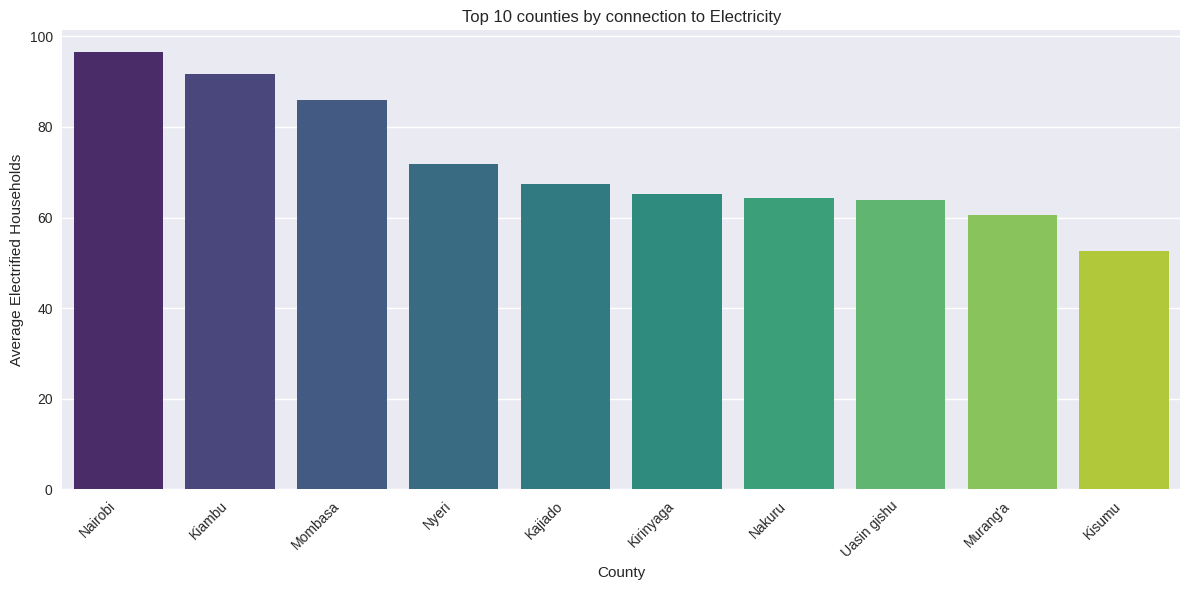

In [10]:
mean_electricity = kplc_data.groupby("CODE")["Mains Electricity"].mean().reset_index()
county_to_code, code_to_county = access.get_code_county_maps()
mean_electricity["CODE"] = mean_electricity["CODE"].apply(lambda x: str(x).zfill(3))
mean_electricity['County'] = mean_electricity["CODE"].map(code_to_county).str.capitalize()
assess.plot_series(s=mean_electricity.sort_values(by="Mains Electricity", ascending=False)[:10],x="County",y="Mains Electricity",title="Top 10 counties by connection to Electricity",ylabel="Average Electrified Households",xlabel="County")

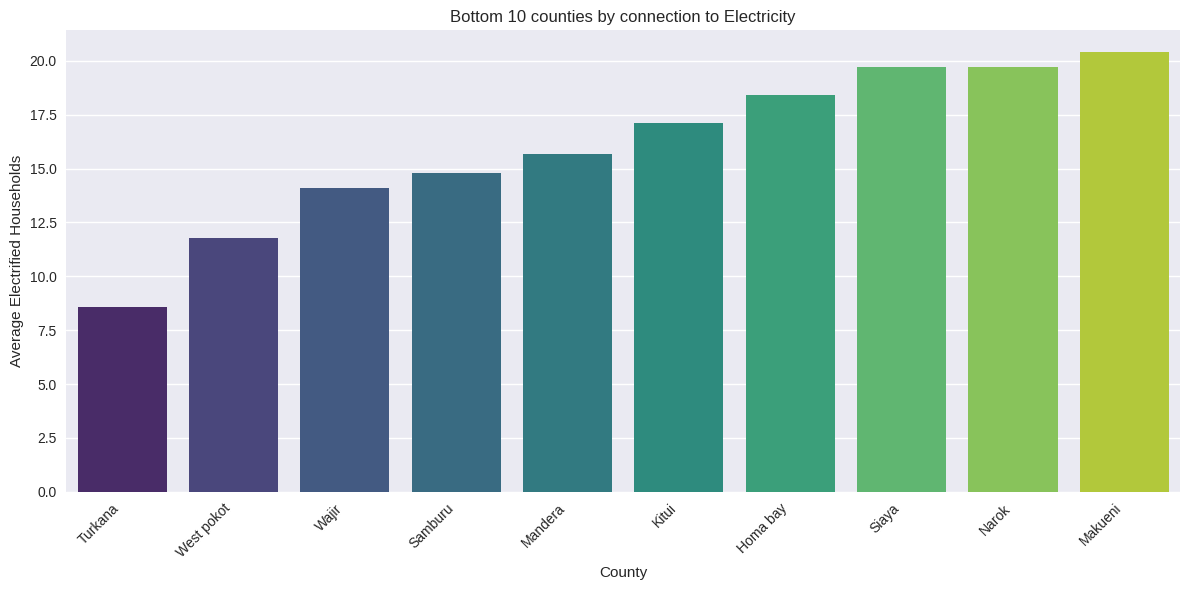

In [11]:
assess.plot_series(s=mean_electricity.sort_values(by="Mains Electricity", ascending=True)[:10],x="County",y="Mains Electricity",title="Bottom 10 counties by connection to Electricity",ylabel="Average Electrified Households",xlabel="County")

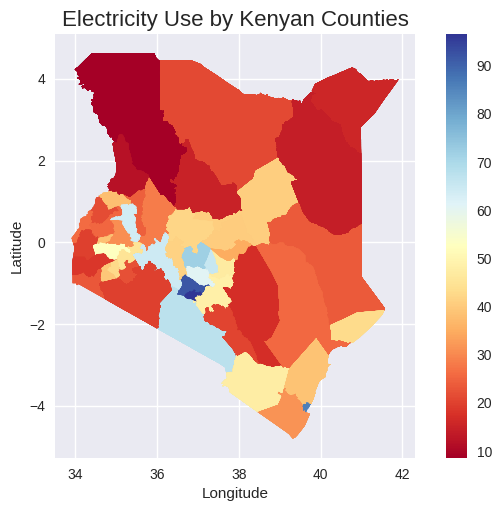

In [12]:
#Load Kenyan Map
gdf_counties, gdf, kenya_poly = assess.get_kenyan_maps()
assess.get_kenyan_map_with_electricity(gdf_counties, gdf, kenya_poly)

### Seems like the southern hemisphere is better electrified (global south) :D

## 3. How many times does the average Kenyan household lose power per month?

In [13]:
epra_data['SAIFI'].mean(),epra_data['SAIFI'].max(),epra_data['SAIFI'].min()

(3.8316666666666666, 5.03, 2.81)

### 4 times a month (average) , once a week

## 4. When lights go off, how long does it usually last?

In [14]:
epra_data['CAIDI'].mean(),epra_data['CAIDI'].max(),epra_data['CAIDI'].min()

(2.536111111111111, 3.4, 2.0)

## 2 and a half hours

## 5. How many hours in a month a Kenyan household without power?

In [15]:
epra_data['SAIDI'].mean(),epra_data['SAIDI'].max(),epra_data['SAIDI'].min()

(9.786111111111111, 17.3, 5.5)

## about 10 hours

---

## Phase 2: Assess - Data Quality Assessment

The second phase involves understanding data quality and characteristics without preconceived questions.

In [16]:
# Assess data quality using the assess module
print("🔍 Assessing data quality...")
assessed_data = assess.census_kplc_data()

if assessed_data is not None:
    print(f"✅ Data assessment completed: {len(assessed_data)} rows, {len(assessed_data.columns)} columns")
    
    # Display basic data quality metrics
    print("\n📈 Data Quality Summary:")
    print(f"   • Missing values: {assessed_data.isnull().sum().sum()} total")
    print(f"   • Duplicate rows: {assessed_data.duplicated().sum()}")
    print(f"   • Memory usage: {assessed_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
else:
    print("❌ Data assessment failed. Check the assess module implementation.")

🔍 Assessing data quality...
✅ Data assessment completed: 389 rows, 19 columns

📈 Data Quality Summary:
   • Missing values: 10 total
   • Duplicate rows: 0
   • Memory usage: 0.14 MB


### Data Quality Visualization

/tmp/ipykernel_36/3958536302.py:32: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  assessed_data[numeric_cols[:3]].hist(ax=axes[1,1], bins=20)


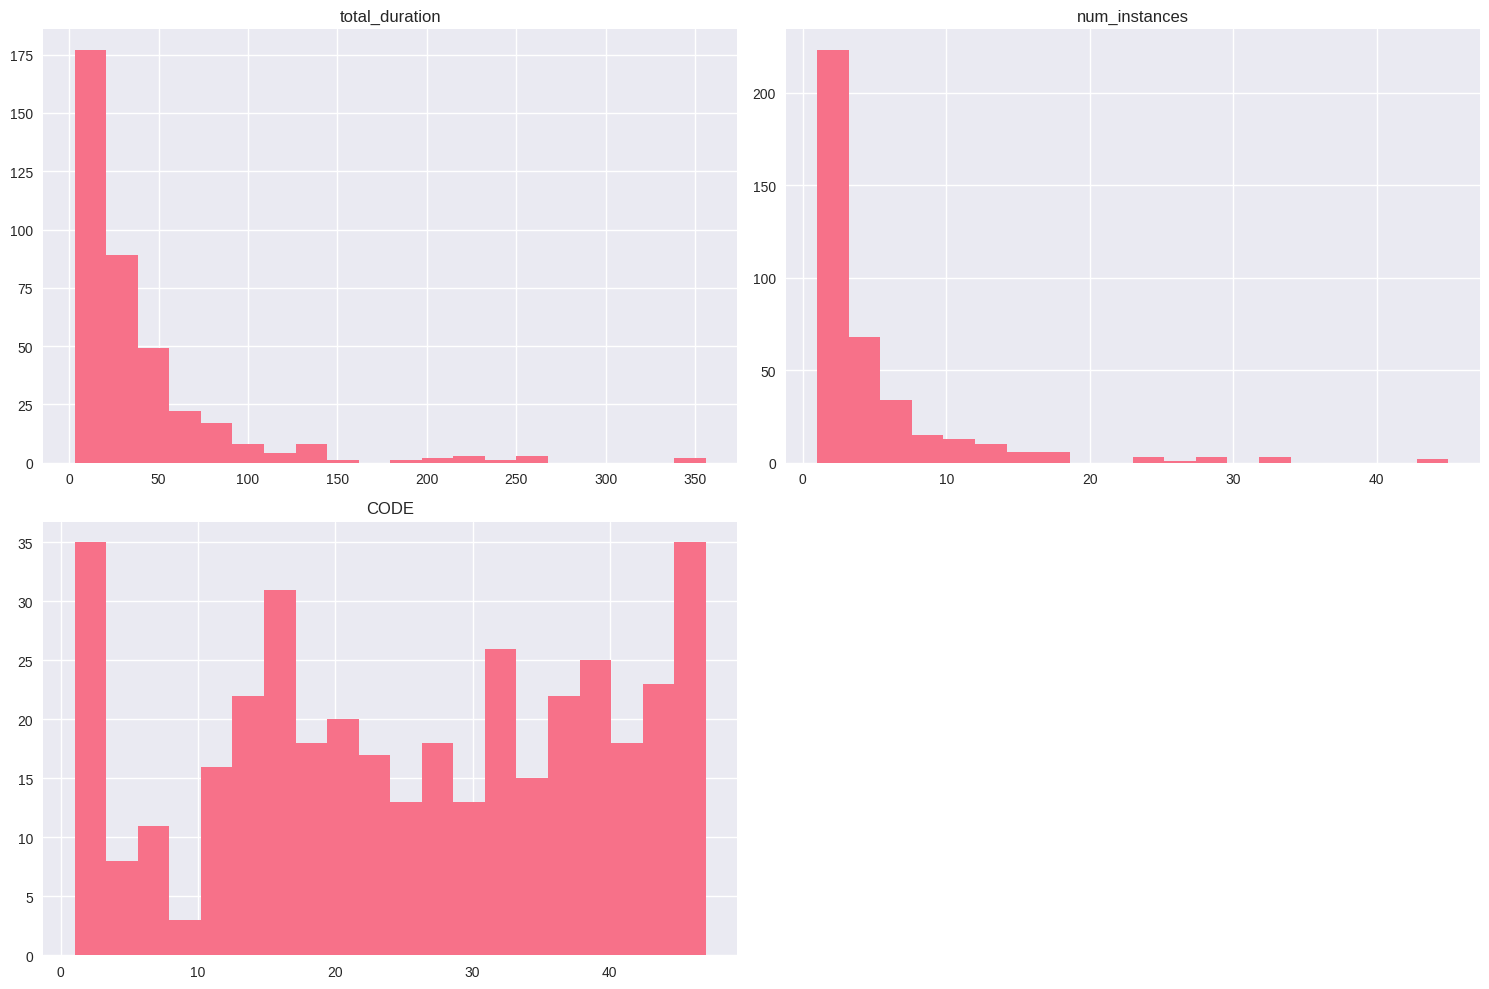

In [17]:
# Visualize data quality issues
if assessed_data is not None:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Missing values heatmap
    missing_data = assessed_data.isnull()
    if missing_data.any().any():
        sns.heatmap(missing_data, cbar=True, ax=axes[0,0])
        axes[0,0].set_title('Missing Values Heatmap')
    else:
        axes[0,0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=axes[0,0].transAxes)
        axes[0,0].set_title('Missing Values Heatmap')
    
    # Data types distribution
    data_types = assessed_data.dtypes.value_counts()
    axes[0,1].pie(data_types.values, labels=data_types.index, autopct='%1.1f%%')
    axes[0,1].set_title('Data Types Distribution')
    
    # Column-wise missing values
    missing_counts = assessed_data.isnull().sum()
    if missing_counts.sum() > 0:
        missing_counts[missing_counts > 0].plot(kind='bar', ax=axes[1,0])
        axes[1,0].set_title('Missing Values by Column')
        axes[1,0].tick_params(axis='x', rotation=45)
    else:
        axes[1,0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Missing Values by Column')
    
    # Numeric data distribution (if available)
    numeric_cols = assessed_data.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        assessed_data[numeric_cols[:3]].hist(ax=axes[1,1], bins=20)
        axes[1,1].set_title('Numeric Data Distribution')
    else:
        axes[1,1].text(0.5, 0.5, 'No Numeric Columns', ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Numeric Data Distribution')
    
    plt.tight_layout()
    plt.show()

## 6. As per Q3, you'll experience about 4 interruptions per month, how many of these are planned interruptions?

In [18]:
kplc_data

,date,county,total_duration,num_instances,month_year,CODE,Conventional Households,Mains Electricity,UNIT_AREA,UNIT_PERIM,COUNT,COUNTY_NAM,TOTAL_POP,POP_DENSIT,Latitude,Longitude,CHME,PPH,electrified_households
0,2024-09-30,mombasa,16.0,2.0,2024-09,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
1,2024-10-31,mombasa,8.0,1.0,2024-10,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
2,2024-12-31,mombasa,24.0,3.0,2024-12,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
3,2025-01-31,mombasa,40.0,5.0,2025-01,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
4,2025-02-28,mombasa,20.0,3.0,2025-02,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2025-05-31,nairobi,256.0,32.0,2025-05,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
385,2025-06-30,nairobi,40.0,5.0,2025-06,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
386,2025-07-31,nairobi,256.0,32.0,2025-07,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
387,2025-08-31,nairobi,237.0,28.0,2025-08,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362


In [19]:
interruptions_per_month = kplc_data.groupby("month_year")["num_instances"].sum().reset_index()
kenyan_avg = interruptions_per_month["num_instances"]/NT*average_people_electrified_per_county
kenyan_avg.mean()

3.1371565270360224

In [20]:
interruptions_per_county = kplc_data.groupby("county")["num_instances"].mean().reset_index()
interruptions_per_county["county"] = interruptions_per_county["county"].str.capitalize()

### As per the data each of the 3.14 interruptions would be caused by planned interruptions on average

## 7. Which counties experience more vs less planned interruptions?

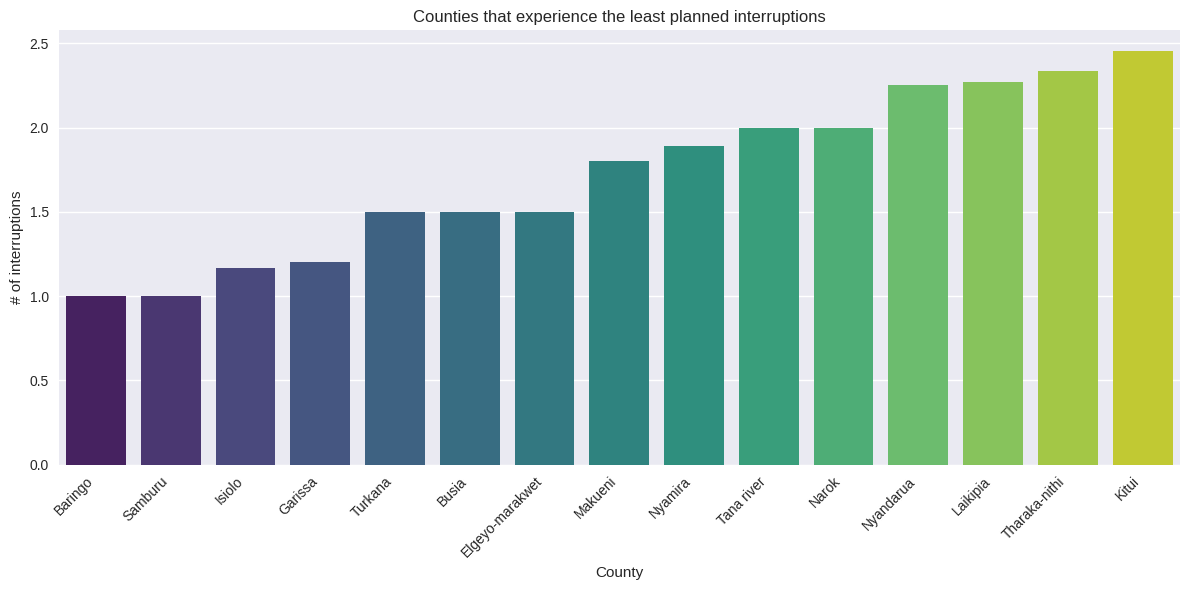

In [21]:
assess.plot_series(s=interruptions_per_county.sort_values(by="num_instances", ascending=True)[:15],x="county",y="num_instances",title="Counties that experience the least planned interruptions",ylabel="# of interruptions",xlabel="County")

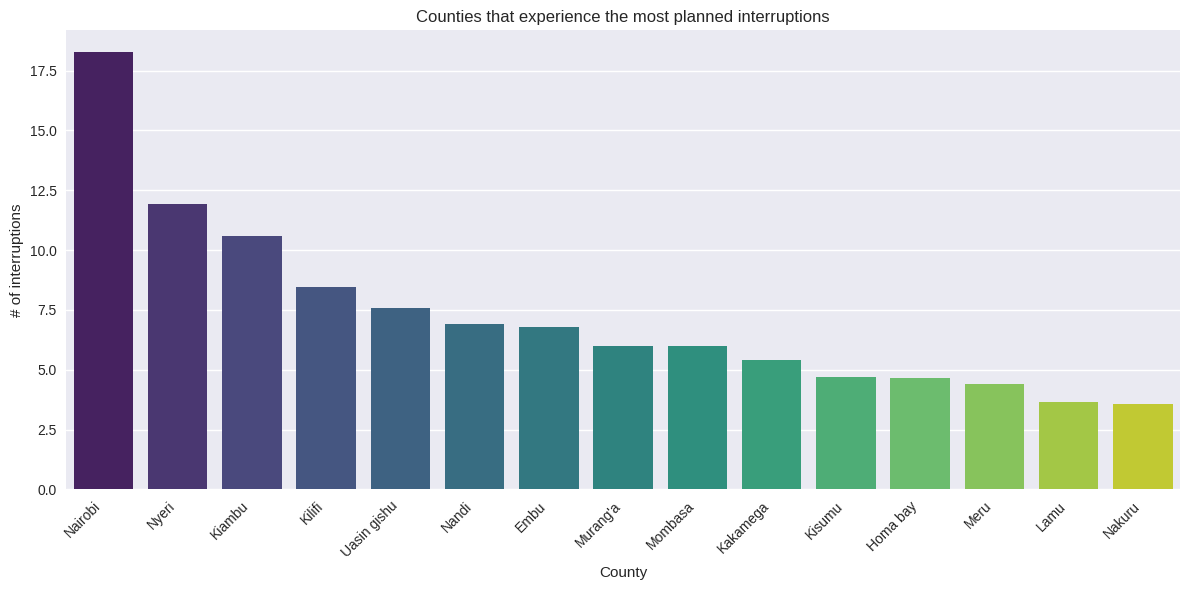

In [22]:
assess.plot_series(s=interruptions_per_county.sort_values(by="num_instances", ascending=not True)[:15],x="county",y="num_instances",title="Counties that experience the most planned interruptions",ylabel="# of interruptions",xlabel="County")

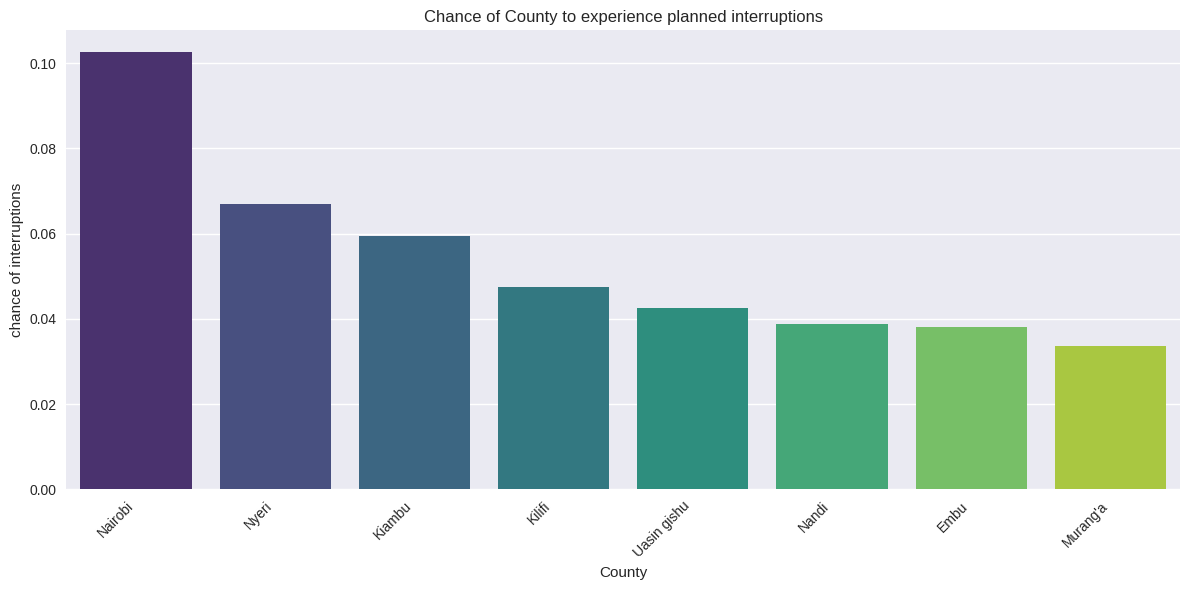

In [23]:
s_norm = interruptions_per_county.sort_values(by="num_instances", ascending=not True)
s_norm["percent"] = s_norm["num_instances"] / s_norm["num_instances"].sum()
assess.plot_series(s=s_norm[:8],x="county",y="percent",title="Chance of County to experience planned interruptions",ylabel="chance of interruptions",xlabel="County")

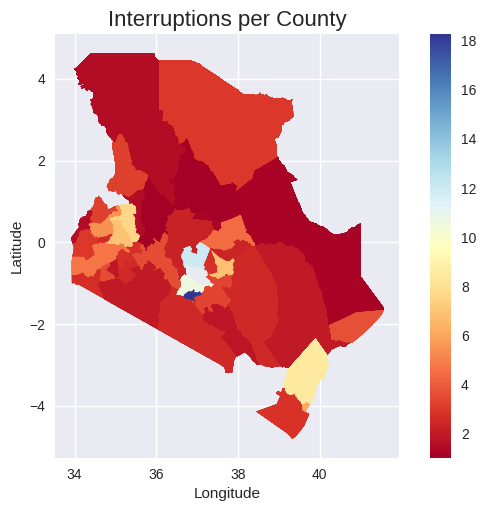

In [24]:
assess.get_kenyan_map_with_series(df=interruptions_per_county,gdf_counties=gdf_counties, gdf=gdf, kenya_poly=kenya_poly,title="Interruptions per County",col="num_instances")

# ###
# TO ADD
# Interruptions per county per month (generate gif of interruptions per month per county)
# ###

## 8. Which day of the week has most planned interruptions?

In [25]:
kplc_only_data = access.kplc_data()
# Count interruptions per day
interruptions_per_day = kplc_only_data["day_of_week"].value_counts(normalize=True).reset_index()
interruptions_per_day.columns = ["day_of_week", "interruptions"]
interruptions_per_day

,day_of_week,interruptions
0,Thursday,0.242424
1,Tuesday,0.238703
2,Wednesday,0.197767
3,Sunday,0.103137
4,Monday,0.091972
5,Friday,0.080276
6,Saturday,0.045720


In [26]:
interruptions_per_day = kplc_only_data["day_of_week"].value_counts(normalize=True).reset_index()
interruptions_per_day.columns = ["day_of_week", "interruptions"]
interruptions_per_day

,day_of_week,interruptions
0,Thursday,0.242424
1,Tuesday,0.238703
2,Wednesday,0.197767
3,Sunday,0.103137
4,Monday,0.091972
5,Friday,0.080276
6,Saturday,0.045720


In [27]:
interruptions_per_day['interruptions'].mean()

0.14285714285714285

In [28]:
# Make sure 'duration_hours' is numeric
kplc_only_data['duration_hours'] = pd.to_numeric(kplc_only_data['duration_hours'], errors='coerce')

# Group by day_of_week and sum the duration
duration_by_day = kplc_only_data.groupby('day_of_week')['duration_hours'].sum().reset_index()
#weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

duration_by_day['day_of_week'] = pd.Categorical(duration_by_day['day_of_week'], categories=weekday_order, ordered=True)
duration_by_day = duration_by_day.sort_values('day_of_week')

print(duration_by_day)

  day_of_week  duration_hours
1      Monday     1380.000000
5     Tuesday     3540.083333
6   Wednesday     2937.000000
4    Thursday     3611.583333
0      Friday     1192.250000
2    Saturday      681.000000
3      Sunday     1513.000000


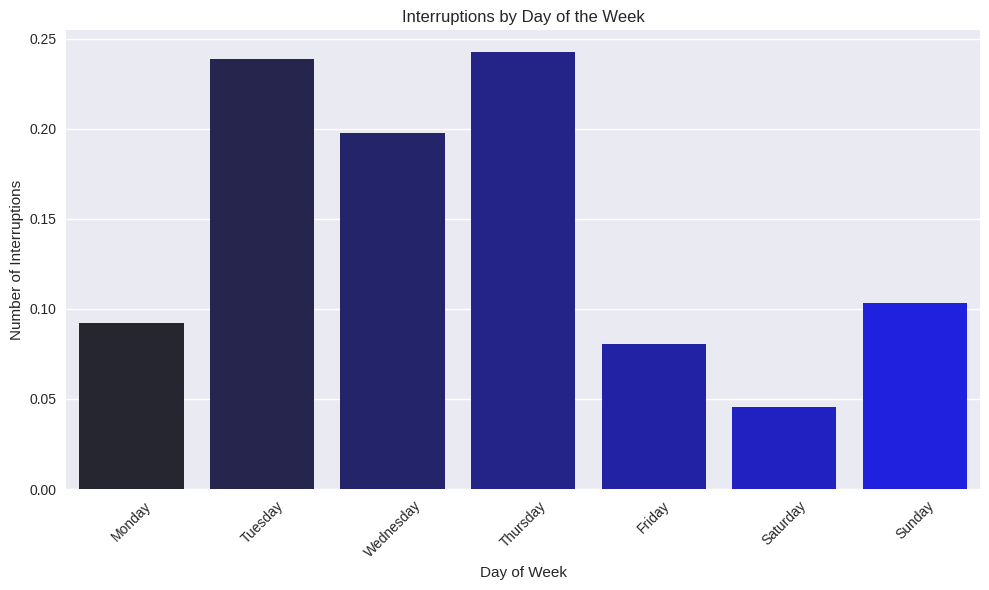

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=interruptions_per_day,x="day_of_week",y="interruptions",palette="dark:b",order=weekday_order)
plt.title("Interruptions by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Interruptions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Thursdays, Tuesdays and Wednesdays experience most planned interruptions

## Day of the month?

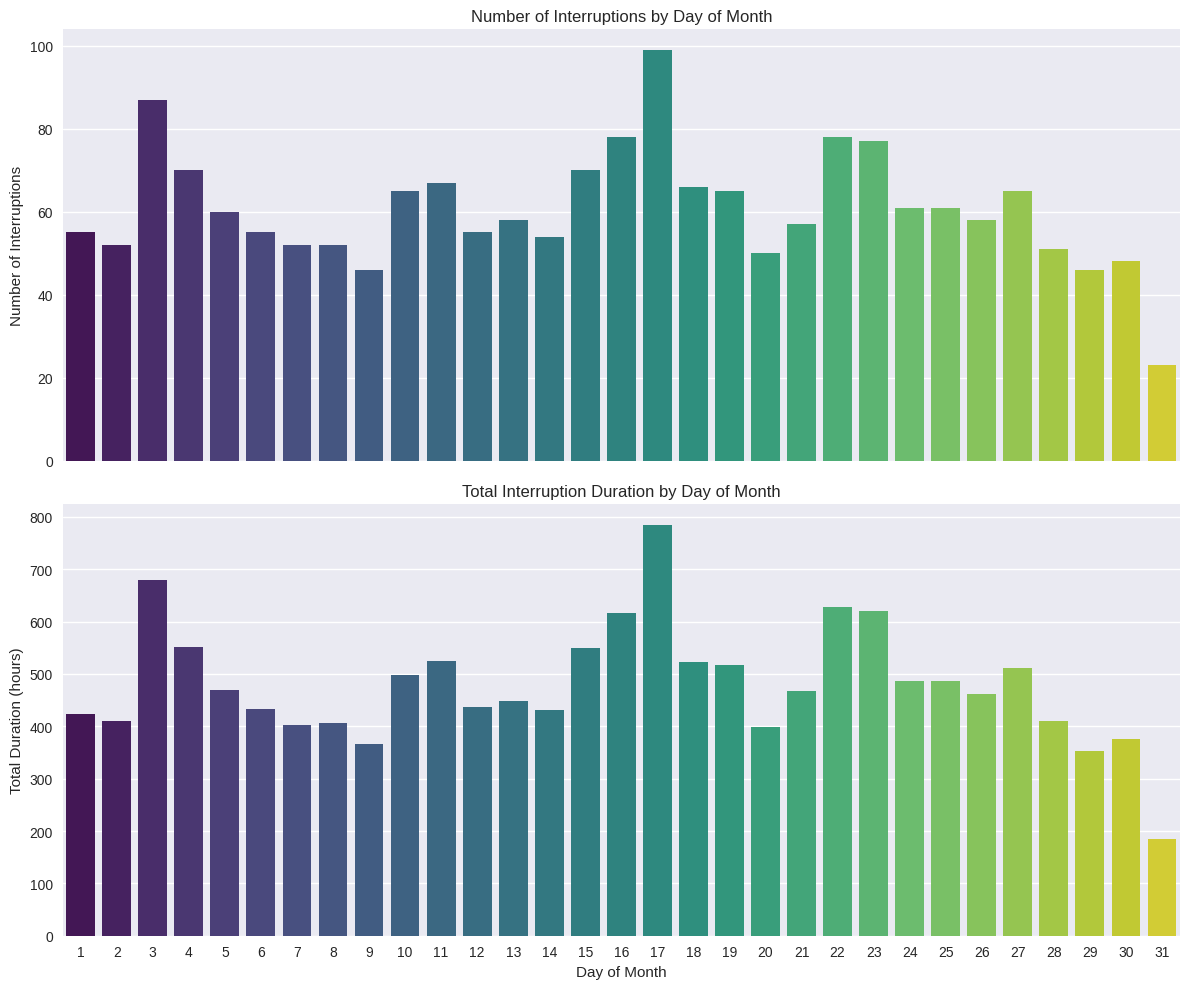

In [30]:
kplc_only_data['date'] = pd.to_datetime(kplc_only_data['date'], errors='coerce')

# Certify 'duration_hours' is numeric
kplc_only_data['duration_hours'] = pd.to_numeric(kplc_only_data['duration_hours'], errors='coerce')

# Extract day of month from date column (assuming 'date' exists and is datetime)
kplc_only_data['day_of_month'] = kplc_only_data['date'].dt.day


interruptions_per_day = kplc_only_data['day_of_month'].value_counts(ascending=True).reset_index()
interruptions_per_day.columns = ['day_of_month', 'interruptions']
duration_by_day = kplc_only_data.groupby('day_of_month')['duration_hours'].sum().reset_index()

assess.plot_interruptions_by_day_of_month(interruptions_per_day,duration_by_day)

In [31]:
# Analyze data using the address module
print("🔍 Analyzing data to address specific questions...")
analysis_results = address.analyze_data(assessed_data)

if 'error' not in analysis_results:
    print("✅ Data analysis completed successfully")
    print(f"📊 Sample size: {analysis_results.get('sample_size', 'N/A')}")
    print(f"📋 Columns analyzed: {len(analysis_results.get('columns', []))}")
    print(f"🔍 Analysis complete: {analysis_results.get('analysis_complete', False)}")
else:
    print(f"❌ Analysis failed: {analysis_results.get('error', 'Unknown error')}")

🔍 Analyzing data to address specific questions...
Analysis completed. Sample size: 389
✅ Data analysis completed successfully
📊 Sample size: 389
📋 Columns analyzed: 19
🔍 Analysis complete: True


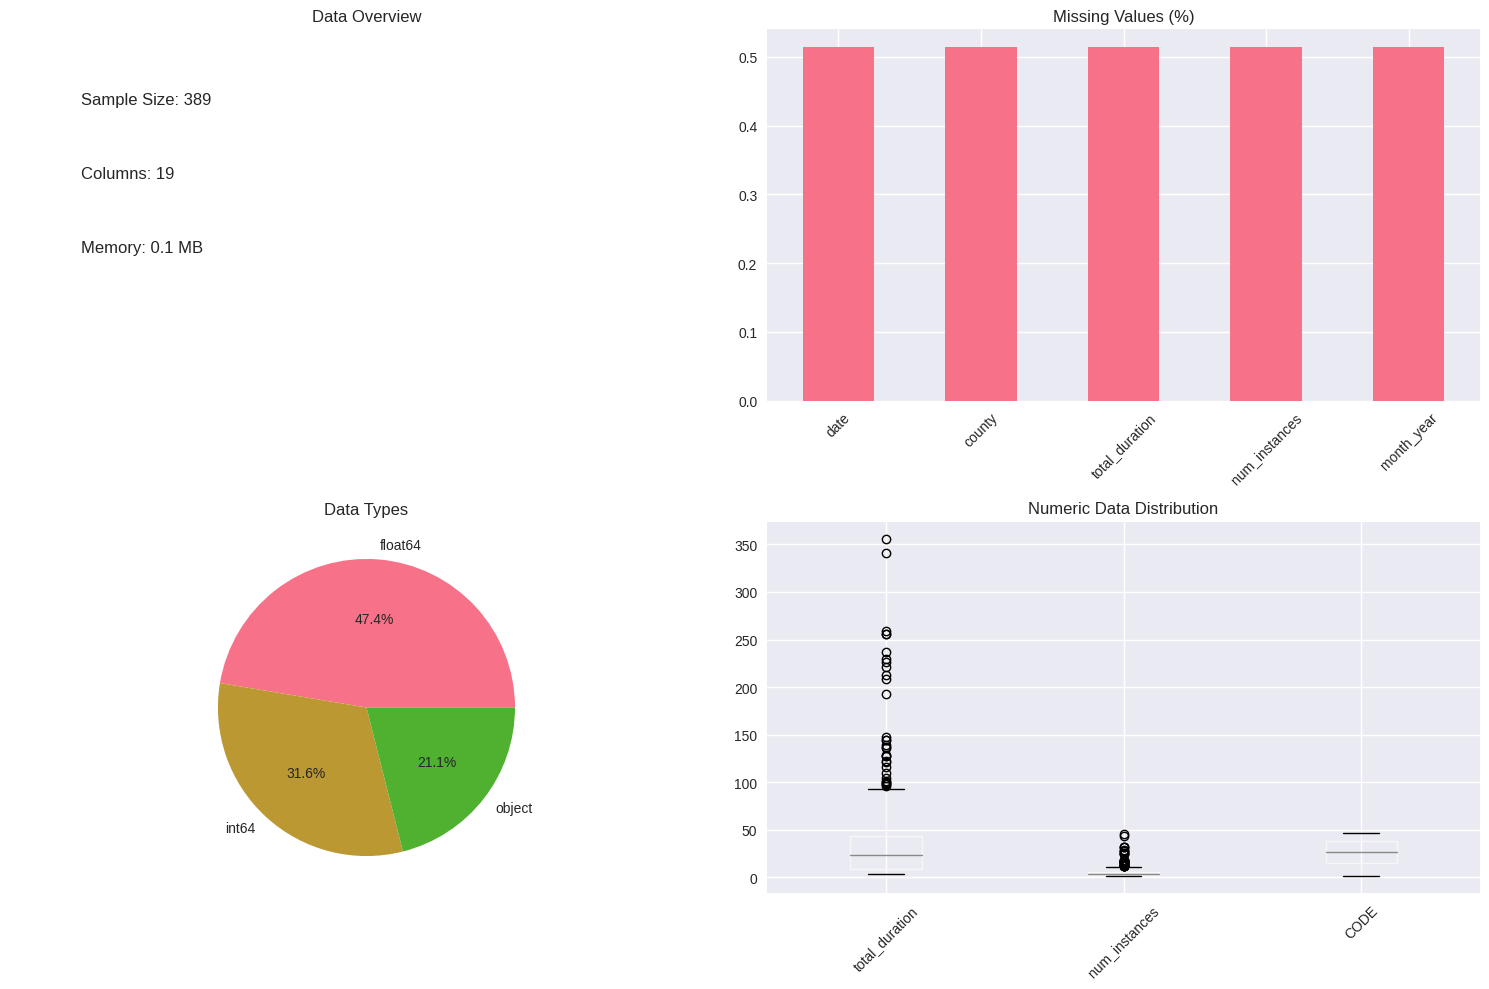

In [32]:
# Display analysis results
if 'error' not in analysis_results and assessed_data is not None:
    # Create summary visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Data overview
    axes[0,0].text(0.1, 0.8, f'Sample Size: {len(assessed_data)}', fontsize=12, transform=axes[0,0].transAxes)
    axes[0,0].text(0.1, 0.6, f'Columns: {len(assessed_data.columns)}', fontsize=12, transform=axes[0,0].transAxes)
    axes[0,0].text(0.1, 0.4, f'Memory: {assessed_data.memory_usage(deep=True).sum() / 1024**2:.1f} MB', fontsize=12, transform=axes[0,0].transAxes)
    axes[0,0].set_title('Data Overview')
    axes[0,0].axis('off')
    
    # Missing values summary
    missing_pct = (assessed_data.isnull().sum() / len(assessed_data)) * 100
    if missing_pct.sum() > 0:
        missing_pct[missing_pct > 0].plot(kind='bar', ax=axes[0,1])
        axes[0,1].set_title('Missing Values (%)')
        axes[0,1].tick_params(axis='x', rotation=45)
    else:
        axes[0,1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Missing Values (%)')
    
    # Data types
    data_types = assessed_data.dtypes.value_counts()
    axes[1,0].pie(data_types.values, labels=data_types.index, autopct='%1.1f%%')
    axes[1,0].set_title('Data Types')
    
    # Numeric summary (if available)
    numeric_cols = assessed_data.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        assessed_data[numeric_cols[:3]].boxplot(ax=axes[1,1])
        axes[1,1].set_title('Numeric Data Distribution')
        axes[1,1].tick_params(axis='x', rotation=45)
    else:
        axes[1,1].text(0.5, 0.5, 'No Numeric Columns', ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Numeric Data Distribution')
    
    plt.tight_layout()
    plt.show()

---

## Phase 3: Address - Question Answering

The third phase involves answering specific questions using the assessed data, including modeling and visualization.

### Analysis Results Visualization

## 9. What is the relationship between the indexes and the planned interruptions

In [33]:
kplc_data

,date,county,total_duration,num_instances,month_year,CODE,Conventional Households,Mains Electricity,UNIT_AREA,UNIT_PERIM,COUNT,COUNTY_NAM,TOTAL_POP,POP_DENSIT,Latitude,Longitude,CHME,PPH,electrified_households
0,2024-09-30,mombasa,16.0,2.0,2024-09,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
1,2024-10-31,mombasa,8.0,1.0,2024-10,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
2,2024-12-31,mombasa,24.0,3.0,2024-12,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
3,2025-01-31,mombasa,40.0,5.0,2025-01,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
4,2025-02-28,mombasa,20.0,3.0,2025-02,1,376295,85.9,0.023356,0.967209,34,Mombasa,1208333,517.354427,-4.0435,40.0000,323237,3.0,323237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2025-05-31,nairobi,256.0,32.0,2025-05,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
385,2025-06-30,nairobi,40.0,5.0,2025-06,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
386,2025-07-31,nairobi,256.0,32.0,2025-07,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362
387,2025-08-31,nairobi,237.0,28.0,2025-08,47,1494676,96.5,0.057502,1.688550,107,Nairobi,4397073,764.681750,-1.2864,36.8172,1442362,3.0,1442362


In [34]:
interruptions_per_month = kplc_data.groupby("month_year")["num_instances"].sum().reset_index()
print(interruptions_per_month.shape[0])
interruptions_per_month.head()

18


,month_year,num_instances
0,2023-10,1.0
1,2024-01,1.0
2,2024-06,8.0
3,2024-07,19.0
4,2024-08,1.0


In [35]:
duration_of_interruptions_per_month = kplc_data.groupby("month_year")["total_duration"].sum().reset_index()
duration_of_interruptions_per_month.head()

,month_year,total_duration
0,2023-10,9.0
1,2024-01,8.0
2,2024-06,52.0
3,2024-07,150.5
4,2024-08,7.0


In [36]:
diipm = interruptions_per_month.merge(duration_of_interruptions_per_month, on="month_year", how="outer")

In [37]:
counties_merged = diipm.merge(epra_data, left_on="month_year", right_on="month_year_fmt", how="outer")
counties_merged[['num_instances','total_duration','SAIDI','CAIDI','SAIFI']].head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,num_instances,total_duration,SAIDI,CAIDI,SAIFI
0,NaN,NaN,5.5,2.0,2.81
1,NaN,NaN,8.6,2.6,3.28
2,NaN,NaN,11.1,2.2,4.99
3,1.0,9.0,8.1,2.2,3.64
4,NaN,NaN,10.7,2.4,4.50


In [38]:
counties_merged.head(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,month_year,num_instances,total_duration,Year,Month,month_year_fmt,month_year_period,SAIDI_TARGET,SAIDI,CAIDI,CAIDI_TARGET,SAIFI
0,NaN,NaN,NaN,2023.0,July,2023-07,2023-07,5.0,5.50,2.000,3.5,2.81
1,NaN,NaN,NaN,2023.0,August,2023-08,2023-08,5.0,8.60,2.600,3.5,3.28
2,NaN,NaN,NaN,2023.0,September,2023-09,2023-09,5.0,11.10,2.200,3.5,4.99
3,2023-10,1.0,9.000000,2023.0,October,2023-10,2023-10,5.0,8.10,2.200,3.5,3.64
4,NaN,NaN,NaN,2023.0,November,2023-11,2023-11,5.0,10.70,2.400,3.5,4.50
5,NaN,NaN,NaN,2023.0,December,2023-12,2023-12,5.0,8.90,2.300,3.5,3.97
6,2024-01,1.0,8.000000,2024.0,January,2024-01,2024-01,5.0,8.80,2.500,3.5,3.44
7,NaN,NaN,NaN,2024.0,February,2024-02,2024-02,5.0,9.30,2.300,3.5,4.00
8,NaN,NaN,NaN,2024.0,March,2024-03,2024-03,5.0,11.40,2.600,3.5,4.36
9,NaN,NaN,NaN,2024.0,April,2024-04,2024-04,5.0,17.30,3.400,3.5,5.03


In [39]:
counties_merged.describe()

,num_instances,total_duration,Year,SAIDI_TARGET,SAIDI,CAIDI,CAIDI_TARGET,SAIFI
count,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.0,18.000000
mean,104.500000,825.273148,2023.666667,5.0,9.786111,2.536111,3.5,3.831667
std,79.323055,631.368630,0.485071,0.0,2.592145,0.329702,0.0,0.643687
min,1.000000,7.000000,2023.000000,5.0,5.500000,2.000000,3.5,2.810000
25%,27.250000,211.250000,2023.000000,5.0,8.642500,2.325000,3.5,3.450000
50%,103.000000,819.291667,2024.000000,5.0,9.100000,2.496500,3.5,3.725000
75%,178.750000,1414.375000,2024.000000,5.0,10.590000,2.652500,3.5,4.270000
max,216.000000,1705.500000,2024.000000,5.0,17.300000,3.400000,3.5,5.030000


In [40]:
corr_matrix = counties_merged[['num_instances','total_duration','SAIDI','CAIDI','SAIFI']].corr()

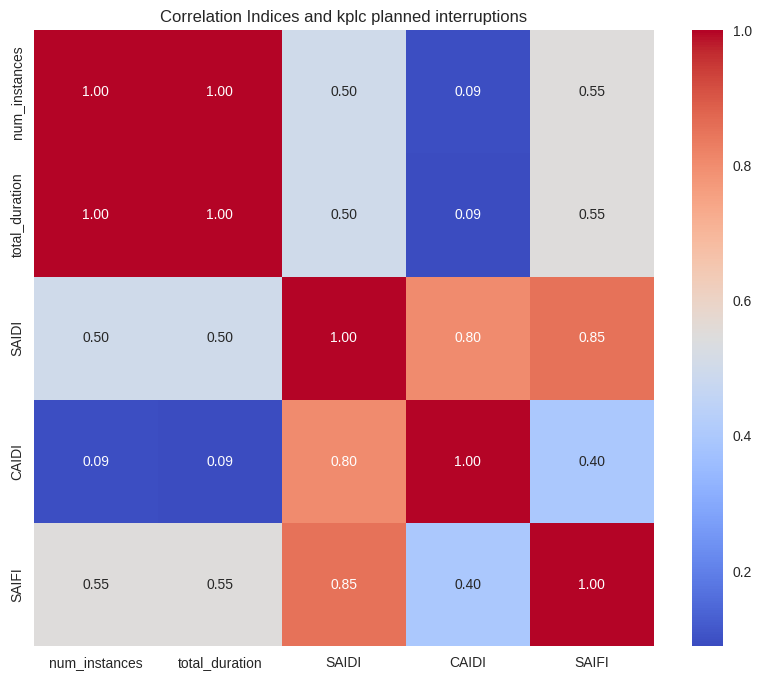

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Indices and kplc planned interruptions")
plt.show()

Number of instances and duraion of instances has a +ve correlation of 0.5

<Figure size 1200x600 with 0 Axes>

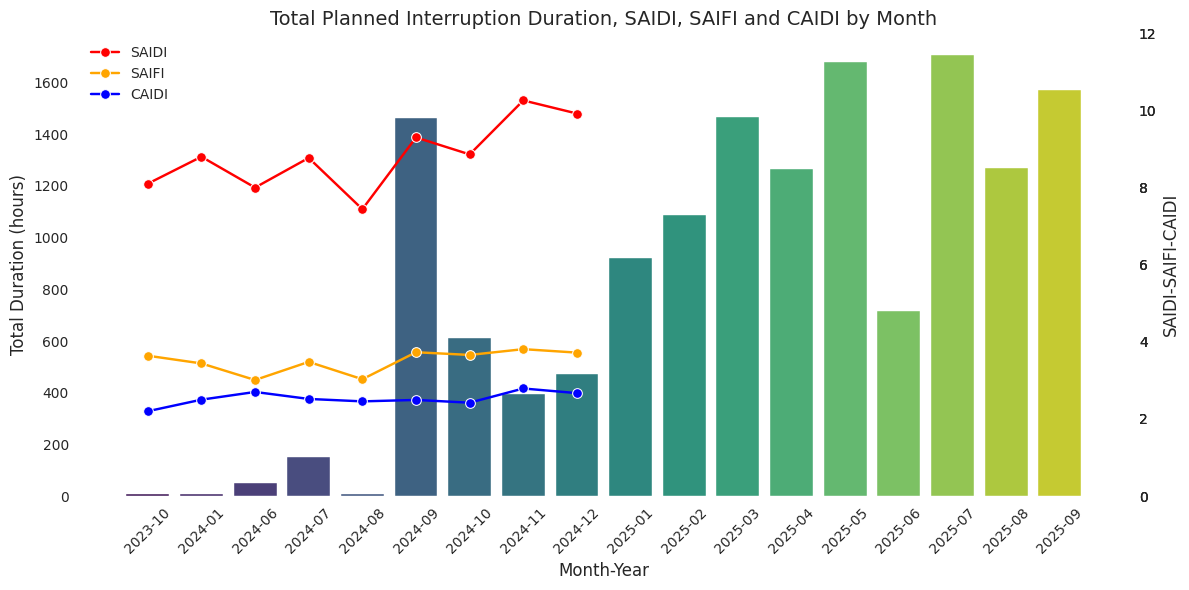

In [42]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")
assess.plot_indices_with_duration_of_interruption(duration_of_interruptions_per_month,counties_merged)

Seems like some of the interruptions data Nov-2023 to May-2024 may be missing from the above plot

## 10. Probability of a blackout on a per month basis

Huge thank you to the organizers of the Machine Learning Foundations Course 2025 in Nyeri, Kenya. This knowledge of fynesse is invaluable.